In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:20,.2f}'.format


!jupyter nbextension enable --py --sys-prefix widgetsnbextension
import os
from ipywidgets import interact
from ipywidgets import interact
import ipywidgets as widgets
import pandas as pd
from IPython.display import display
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def world_cloud(wc,species='species'):
    mpl.rcParams['figure.figsize']=(12.0,18.0)    #(6.0,4.0)
    mpl.rcParams['font.size']=16                #10 
    mpl.rcParams['savefig.dpi']=100            #72 
    mpl.rcParams['figure.subplot.bottom']=.1 


    stopwords = set(STOPWORDS)


    wordcloud = WordCloud(
                              background_color='red',

                              max_words=100,
                              max_font_size=50, 
                              random_state=0
                             ).generate(str(wc))

    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.title(species)
    plt.axis('off')
    plt.show()
    

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
os.listdir('/kaggle/input/')

['wiki-covid-map', 'covid-all-wiki-columns-data', 'CORD-19-research-challenge']

# Extracting keywords and category from wikifier 
## http://www.wikifier.org/

I have extracted major topics and keywords from the wikifier to have specific match 

[old version to extract title](https://www.kaggle.com/yatinece/wiki-data?scriptVersionId=30676608) ( I will need to run this in other notebook)
[Version to extract all data ](https://www.kaggle.com/yatinece/wiki-data)

### Data sources are attached in the notebook.

Most of the cells are hidden. Please fork the notebook to develop 

In [3]:
def extract_response(response):
    all_wrds=[]
    try:
        for annotation in response["annotations"]:
            if annotation["cosine"]>0.1:
                #print("%s (%s) %s" % (annotation["title"], annotation["url"], annotation["dbPediaTypes"]))
                all_wrds.append((annotation["title"],annotation["dbPediaTypes"]))
    except:
        1==1
    return all_wrds  

def function_join_title(response):
    title=''
    for k in range(len(response['words'])):
        title=title+response["spaces"][k]+response["words"][k]
    return title

# Reading data for title only extract

In [4]:
read_data=pd.read_pickle('/kaggle/input/wiki-covid-map/abstract_res_all.pkl')

# Reading data for all text 

In [5]:
read_data_All=pd.read_pickle('/kaggle/input/covid-all-wiki-columns-data/ALL_study_with_wiki_columns.pkl')
read_data_All['unique_id']=range(len(read_data))
read_data_All_p=read_data_All[['unique_id','all_txt_resp']]

read_data_All_p['words_wiki']=read_data_All_p['all_txt_resp'].apply(lambda x: extract_response(x))
lst_col='words_wiki'
read_data_All_p=read_data_All_p.explode(lst_col)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
read_data_All_p=pd.concat([read_data_All_p,pd.DataFrame(read_data_All_p[lst_col].tolist(), index=read_data_All_p.index , columns=['keywords','wikitype']  )],axis=1)
read_data_All_p=read_data_All_p.explode('wikitype')
read_data_All_p=read_data_All_p.drop(['all_txt_resp','words_wiki'],axis=1)
metadata_limit1=pd.DataFrame()
metadata_limit1['wiki_article_resp']=np.array(read_data)
metadata_limit1['words']=metadata_limit1['wiki_article_resp'].apply(lambda x: extract_response(x))
metadata_limit1['title']=metadata_limit1['wiki_article_resp'].apply(lambda x : function_join_title(x))
metadata_limit=read_data_All.merge(metadata_limit1,on='title',how='inner')
lst_col='words'
df=metadata_limit

df=df.explode(lst_col)
df=pd.concat([df,pd.DataFrame(df[lst_col].tolist(), index=df.index , columns=['keywords','wikitype']  )],axis=1)
df.groupby('keywords').count()['words'].reset_index().sort_values('words',ascending=False)
df=df.explode('wikitype')

top_wikitype=(df.groupby(['wikitype'])['unique_id'].nunique().reset_index().sort_values('unique_id',ascending=False))
#df.groupby(['wikitype',])['keywords'].nunique().reset_index().sort_values('keywords',ascending=False)[:20]

# Top Category mentioned in title of articles 

In [7]:
top_keywrd=df.groupby('keywords')['unique_id'].nunique().reset_index().sort_values('unique_id',ascending=False)


import plotly.express as px
top_wikitype_1 = top_wikitype[:100].copy()
top_wikitype_1.columns=['Cat_type','# docs']
fig = px.bar(top_wikitype_1, x='Cat_type', y='# docs')
fig.show()

top_keywrd_1 = top_keywrd[:100].copy()
top_keywrd_1.columns=['keywords','# docs']
fig = px.bar(top_keywrd_1, x='keywords', y='# docs')

fig.show()



# Top mention category and keywords in articles complete

In [8]:

top_wikitype_all=(read_data_All_p.groupby(['wikitype'])['unique_id'].nunique().reset_index().sort_values('unique_id',ascending=False))
top_keywrd_all=read_data_All_p.groupby('keywords')['unique_id'].nunique().reset_index().sort_values('unique_id',ascending=False)


import plotly.express as px
top_wikitype_all_1 = top_wikitype_all[:100].copy()
top_wikitype_all_1.columns=['Cat_type','# docs']
fig = px.bar(top_wikitype_1, x='Cat_type', y='# docs')
fig.show()

top_keywrd_all_1 = top_keywrd_all[:100].copy()
top_keywrd_all_1.columns=['keywords','# docs']
fig = px.bar(top_keywrd_1, x='keywords', y='# docs')

fig.show()



# Search for article from various publications 

In [9]:
def show_task(keywords='ALL',Cat_type='ALL',license='ALL'):
    df1=df
    if keywords!='ALL' :
        df1=df1[(df1.keywords == keywords) ]
    if Cat_type!='ALL' :
        df1=df1[(df1.wikitype == Cat_type) ]
    if license!='ALL' :
        df1=df1[(df1.license == license) ]
    search_results= df1[['all_txt','source_x','license']].drop_duplicates().head(10)

    return search_results
lt=top_wikitype[['wikitype']].wikitype.to_list()
lt.sort() 
jn=df[['license']].fillna('NA').drop_duplicates().license.tolist()
jn.sort()
kw=['ALL']+top_keywrd[['keywords']].keywords.to_list()[:80]
kw.sort()
display(interact(show_task, keywords = ['ALL']+kw,\
         Cat_type = ['ALL']+lt,\
        license=['ALL']+jn))

,all_txt,source_x,license
0,Does Wuhan Need to be in Lockdown during the C...,PMC_new,cc-by
1,Public Opinion Polarization by Individual Reve...,PMC_new,cc-by
2,Turnover Intention among Field Epidemiologists...,PMC_new,cc-by
3,Enterovirus A71 capsid protein VP1 increases b...,PMC_new,cc-by
4,Chapter 28 Select agent regulationsAbstract Se...,Elsevier,els-covid
5,Chapter 20 Design of genomic signatures for pa...,Elsevier,els-covid
6,Chapter 14 The use of host factors in microbia...,Elsevier,els-covid
7,IndexUnknownUnknown,Elsevier,els-covid
22627,Indexfull_text_file,Elsevier,els-covid
67519,IndexPublisher Summary This chapter includes e...,Elsevier,els-covid


<function __main__.show_task(keywords='ALL', Cat_type='ALL', license='ALL')>

# Printing results for top 5 category in title 

In [10]:
import pprint
for k in top_wikitype[['wikitype']].wikitype.to_list()[:5]:
    pprint.pprint(" Top Match for category in title " + str(k),depth=4, width=60) 
    pprint.pprint(show_task(Cat_type=k))
    pprint.pprint('-'*20+'end'+'-'*20)
    print('\n')

' Top Match for category in title Species'
                                                  all_txt  source_x    license
3       Enterovirus A71 capsid protein VP1 increases b...   PMC_new      cc-by
121111  Chapter 9 Nutrition and feeding of dairy cattl...  Elsevier  els-covid
121189  Chapter 16 Shikimic acid as intermediary model...  Elsevier  els-covid
121195  Chapter 40 The Role of Innate Immunity in Regu...  Elsevier  els-covid
121196  Chapter 4 Molecular Modeling of Major Structur...  Elsevier  els-covid
121249  Chapter 4 Interaction of virus populations wit...  Elsevier  els-covid
121250  Chapter 2 Metagenomics revealing new virus spe...  Elsevier  els-covid
128142  Chapter 7 Long-term virus evolution in natureA...  Elsevier  els-covid
128144  Chapter 2 Molecular basis of genetic variation...  Elsevier  els-covid
128170  Chapter 21 Genosensor on gold films with enzym...  Elsevier  els-covid
'--------------------end--------------------'


' Top Match for category in title Diseas

# Printing results for top 5 keywords in title 

In [11]:
import pprint
for k in top_keywrd[['keywords']].keywords.to_list()[:5]:
    pprint.pprint(" Top Match for category in title " + str(k),depth=4, width=60) 
    pprint.pprint(show_task(keywords=k))
    pprint.pprint('-'*20+'end'+'-'*20)
    print('\n')

' Top Match for category in title Virus'
                                                  all_txt  source_x    license
3       Enterovirus A71 capsid protein VP1 increases b...   PMC_new      cc-by
121189  Chapter 16 Shikimic acid as intermediary model...  Elsevier  els-covid
121249  Chapter 4 Interaction of virus populations wit...  Elsevier  els-covid
121250  Chapter 2 Metagenomics revealing new virus spe...  Elsevier  els-covid
128142  Chapter 7 Long-term virus evolution in natureA...  Elsevier  els-covid
128144  Chapter 2 Molecular basis of genetic variation...  Elsevier  els-covid
128170  Chapter 21 Genosensor on gold films with enzym...  Elsevier  els-covid
128296  Chapter 10 Respiratory syncytial virusAbstract...  Elsevier  els-covid
128699  Colorimetric biosensors for point-of-care viru...  Elsevier  els-covid
133339  Chapter 18 Electrochemical virus detections wi...  Elsevier  els-covid
'--------------------end--------------------'


' Top Match for category in title Infectio

# Keywords in top category articles 
# Interact to see word cloud for specific numbers. 
Not able to make it work in publish area

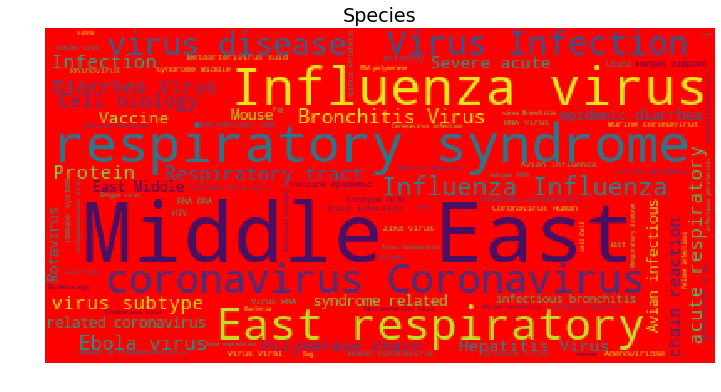

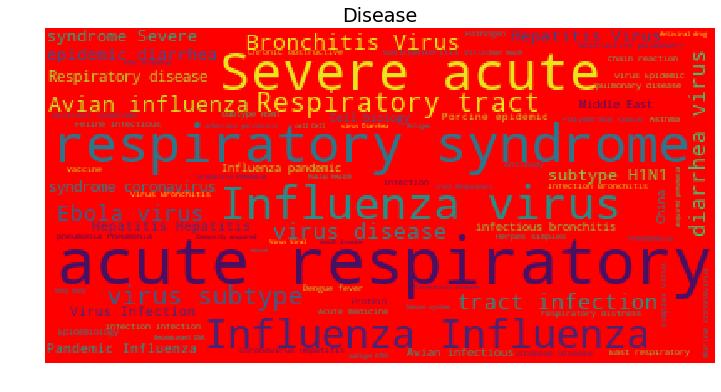

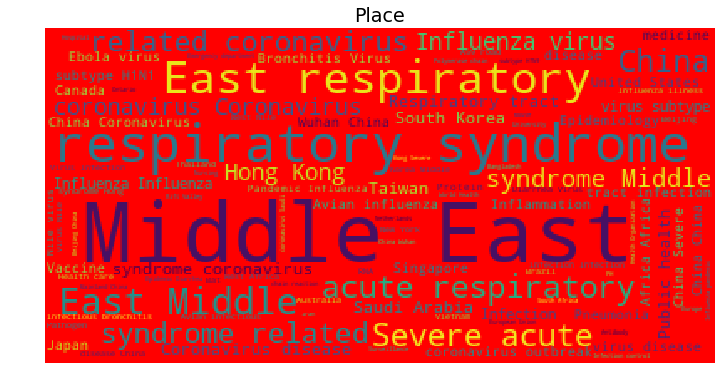

<function __main__.show_wrd_cld(n_type)>

In [12]:
df1=df[['wikitype','keywords','unique_id']].drop_duplicates().fillna('')
def show_wrd_cld(n_type):
    for k in top_wikitype.wikitype.values[:n_type]:
    #for k in ['Protein']:    
        wc=df1[df1['wikitype']==k]
        wc=wc['keywords']
        wc=" ".join(wc)
        world_cloud(wc,species=k)
interact(show_wrd_cld,n_type=range(3,30,1))

# Interact to see word cloud for specific category. 
Not able to make it work in publish area

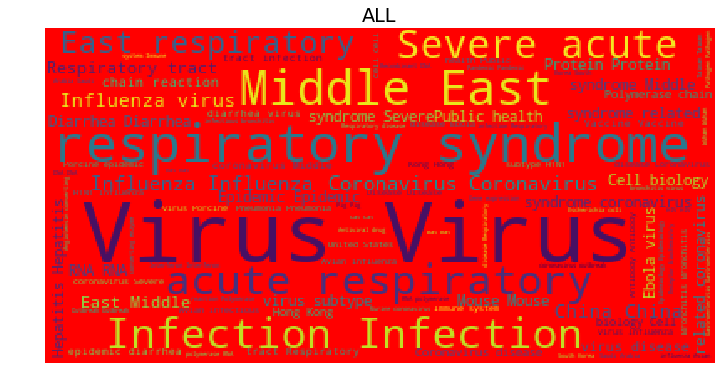

<function __main__.show_wrd_cld_cat(Cat_type)>

In [13]:
df1=df[['wikitype','keywords','unique_id']].drop_duplicates().fillna('')
def show_wrd_cld_cat(Cat_type):
    if Cat_type=='ALL':
        wc1=df1
    else:    
        wc1=df1[df1['wikitype']==Cat_type]
    wc1=wc1['keywords']
    wc1=" ".join(wc1)
    world_cloud(wc1,species=Cat_type)
lt=top_wikitype[['wikitype']].wikitype.to_list()
lt.sort()
interact(show_wrd_cld_cat,Cat_type = ['ALL']+lt)

In [14]:
df.to_pickle('all_title_pickle.pkl')
read_data_All_p.to_pickle('all_title_abs_text_pickle.pkl')